In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import os
import textwrap
import seaborn as sns
import matplotlib

COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f', "#c77dff", "#f7d6e0"]
COLORS_20 = ["#adb5bd", "#7ec4cf", '#4F6272', "#3de0fe", "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897',
             '#9a8c98',
             '#f6bd60', '#8a5a44', "#ede7b1", "#ff9505", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596',
             "#8c2f39", "#d0ee11",
             ]
COLORS_16 = ["#adb5bd", '#4F6272', "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897', '#9a8c98',
             '#f6bd60', "#ede7b1", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596', "#8c2f39"]
greens = ["#004225", "#529471", "#48b5c4", "#529471"]
semi_balck = '#4F6272'
plt.rcParams.update(matplotlib.rcParamsDefault)

In [18]:
results_path = "/Volumes/noamaz/modularity/digits/"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'

task = "digits"
num_layers = '3'
n_features = 3
time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")
res_folder = f"digits_{num_layers}_layers"
plot_path = f"{local_base_path}/plots/digits_multi_arch/{res_folder}"

In [19]:
first_analsis_res_folder = f"{results_path}/{res_folder}/first_analysis_results"
first_analsis_file_name = "2023-11-26-13-45-59_all_results_from_teach_archs_results_with_motifs_1000_ep_no_duplicates_fixed.csv"
lgbm_folder_name = 'exp_2023_11_27_11_00_0_nice_features'


In [20]:
lgb_res_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}"
lgb_res_nn_path = f"{lgb_res_path}/teach_archs_regression_feature_selection_results_1kep_with_preds"

In [21]:
num_features = []
feature_selection_res = pd.DataFrame()
for file_name in os.listdir(lgb_res_path):
    if 'all_exp_mape_prediction_results' not in file_name:
        continue
    if '2023-12-24' in file_name:
        feature_selection_res = pd.read_csv(f"{lgb_res_path}/{file_name}")
    else:
        feature_selection_res2 = pd.read_csv(f"{lgb_res_path}/{file_name}")
feature_selection_res = feature_selection_res.sort_values('num_features').reset_index()
feature_selection_res2 = feature_selection_res2.sort_values('num_features').reset_index()


In [22]:
feature_selection_ind_res = pd.DataFrame()
all_preds = {}
for file_name in os.listdir(lgb_res_nn_path):
    if '._' in file_name:
        continue
    if 'prediction_results.csv' not in file_name:
        continue
    model = pd.read_csv(f"{lgb_res_nn_path}/{file_name}")
    num_features = int(file_name.split('only_')[1].split('_features')[0])
    all_preds[num_features] = model

In [23]:
feature_selection_res

,index,Unnamed: 0,exp_name,num_features,train_mape,train_mape_var,test_mape,test_mape_var
0,5,5,2023-11-27-13-19-33_masked_data_1_features,1,0.138652,0.015050,0.137911,0.014778
1,6,6,2023-11-27-14-20-09_masked_data_2_features,2,0.032252,0.001322,0.032968,0.001401
2,0,0,2023-11-27-14-19-53_masked_data_3_features,3,0.023995,0.000621,0.024326,0.000664
3,9,9,2023-11-27-14-19-44_masked_data_4_features,4,0.060532,0.004196,0.061700,0.004485
4,12,12,2023-11-27-14-19-39_masked_data_5_features,5,0.042144,0.001293,0.042714,0.001363
5,4,4,2023-11-27-14-19-53_masked_data_6_features,6,0.028475,0.001070,0.029228,0.001153
6,1,1,2023-11-27-17-09-22_masked_data_7_features,7,0.024699,0.000593,0.025425,0.000649
7,8,8,2023-11-27-14-20-09_masked_data_8_features,8,0.030301,0.001035,0.031041,0.001100
8,11,11,2023-11-27-14-20-09_masked_data_9_features,9,0.026744,0.000738,0.027311,0.000810
9,3,3,2023-11-27-14-20-09_masked_data_10_features,10,0.027935,0.000674,0.028441,0.000715


In [9]:
feature_selection_res['mape_reletive_cahnge'] = (feature_selection_res[
                                                     'test_mape'] - feature_selection_res['test_mape'].min()) / \
                                                feature_selection_res['test_mape'].min()
feature_selection_res['best r2 test'] = feature_selection_res2['best r2 test']
feature_selection_res['best r2 train'] = feature_selection_res2['best r2 train']
feature_selection_res['r2_reletive_cahnge'] = (feature_selection_res2['best r2 test'].max() - feature_selection_res2[
    'best r2 test']) / feature_selection_res2['best r2 test'].max()

In [10]:
feature_selection_res

,index,Unnamed: 0,exp_name,num_features,train_mape,train_mape_var,test_mape,test_mape_var,mape_reletive_cahnge,best r2 test,best r2 train,r2_reletive_cahnge
0,5,5,2023-11-27-13-19-33_masked_data_1_features,1,0.138652,0.015050,0.137911,0.014778,6.155823,0.636511,0.632764,0.358931
1,6,6,2023-11-27-14-20-09_masked_data_2_features,2,0.032252,0.001322,0.032968,0.001401,0.710599,0.976165,0.975898,0.016845
2,0,0,2023-11-27-14-19-53_masked_data_3_features,3,0.023995,0.000621,0.024326,0.000664,0.262201,0.989592,0.989472,0.003322
3,9,9,2023-11-27-14-19-44_masked_data_4_features,4,0.060532,0.004196,0.061700,0.004485,2.201448,0.981750,0.970512,0.011220
4,12,12,2023-11-27-14-19-39_masked_data_5_features,5,0.042144,0.001293,0.042714,0.001363,1.216344,0.982761,0.978481,0.010202
5,4,4,2023-11-27-14-19-53_masked_data_6_features,6,0.028475,0.001070,0.029228,0.001153,0.516587,0.980941,0.975229,0.012035
6,1,1,2023-11-27-17-09-22_masked_data_7_features,7,0.024699,0.000593,0.025425,0.000649,0.319214,0.987180,0.984825,0.005751
7,8,8,2023-11-27-14-20-09_masked_data_8_features,8,0.030301,0.001035,0.031041,0.001100,0.610622,0.988417,0.987927,0.004505
8,11,11,2023-11-27-14-20-09_masked_data_9_features,9,0.026744,0.000738,0.027311,0.000810,0.417082,0.988593,0.986515,0.004327
9,3,3,2023-11-27-14-20-09_masked_data_10_features,10,0.027935,0.000674,0.028441,0.000715,0.475723,0.988729,0.985989,0.004191


In [11]:
feature_selection_res[feature_selection_res['num_features'].isin((3, 20, 50))][[
    'train_mape',
    'test_mape',
    'mape_reletive_cahnge',
    'best r2 train',
    'best r2 test',
    'r2_reletive_cahnge',
    'num_features',
]].round(4)

,train_mape,test_mape,mape_reletive_cahnge,best r2 train,best r2 test,r2_reletive_cahnge,num_features
2,0.0240,0.0243,0.2622,0.9895,0.9896,0.0033,3
10,0.0204,0.0214,0.1116,0.9914,0.9916,0.0013,20
11,0.0172,0.0193,0.0000,0.9938,0.9929,0.0000,50


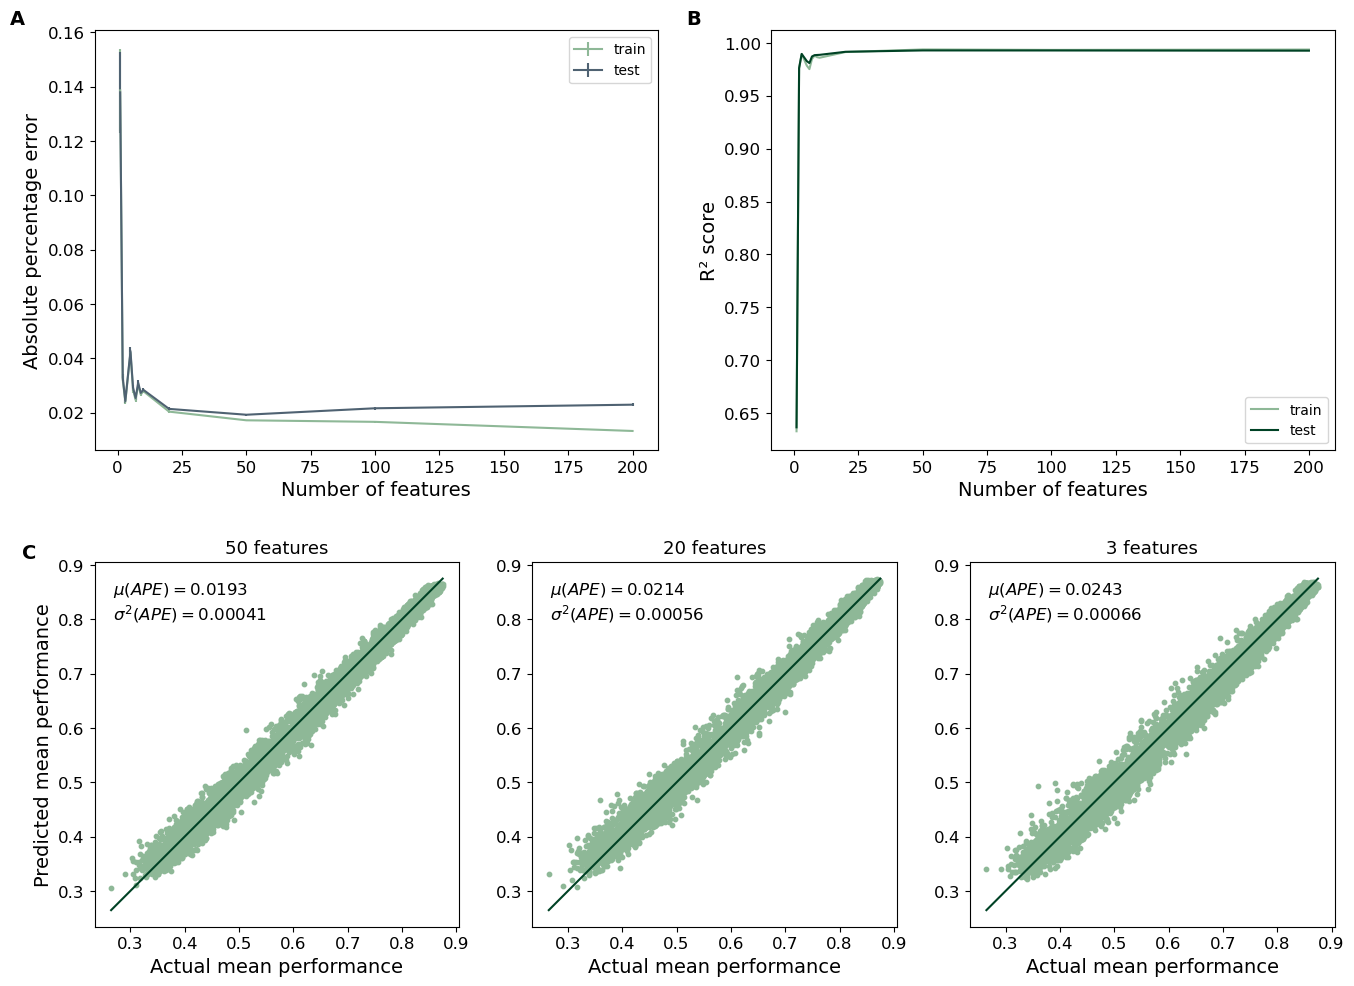

In [12]:

fetureas = [50, 20, 3]
start = 100
stop = 0
fig = plt.figure(figsize=(16, 12))
ax0 = fig.add_subplot(221)
ax01 = fig.add_subplot(222)

ax1 = fig.add_subplot(234)
ax2 = fig.add_subplot(235, sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(236, sharex=ax1, sharey=ax1)

for ax, num_fet in zip((ax1, ax2, ax3), fetureas):
    model = all_preds[num_fet]
    start_ = min(model['test_label'].min(), model['test_pred'].min())
    if start_ < start:
        start = start_
    stop_ = max(model['test_label'].max(), model['test_pred'].max())
    if stop_ > stop:
        stop = stop_
    ax.scatter(model['test_label'], model['test_pred'], s=10, c=COLORS[3])
    res = feature_selection_res[feature_selection_res['num_features'] == num_fet]
    textstr = '\n'.join((
        r'$\mu(APE)=%.4f $' % (res['test_mape']),
        r'$\sigma^2(APE) =%.5f $' % (res['test_mape_var']),))
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12, verticalalignment='top', )
    ax.set_box_aspect(1)
    ax.plot(np.linspace(start, stop, 50), np.linspace(start, stop, 50), c=greens[0])
    ax.set_title(
        f"{num_fet} features",
        wrap=True, fontsize=13)
    ax.set_xlabel('Actual mean performance', fontsize=14)
    ax.tick_params(axis='both', labelsize=12)
ax1.set_ylabel('Predicted mean performance', fontsize=14)

#plt.suptitle(f"{task.capitalize()} - DANN predicted performance vs. actual performance" ,wrap=True, fontsize=14)
feature_selection_res = feature_selection_res[feature_selection_res['num_features'] != 4]
ax0.errorbar(x=feature_selection_res['num_features'], y=feature_selection_res['train_mape'],
             yerr=feature_selection_res['train_mape_var'],
             label='train', c=COLORS[3])
ax0.errorbar(x=feature_selection_res['num_features'], y=feature_selection_res['test_mape'],
             yerr=feature_selection_res['test_mape_var'],
             label='test', c=COLORS[0])
ax01.plot(feature_selection_res['num_features'], feature_selection_res['best r2 train'], label='train', c=COLORS[3])
ax01.plot(feature_selection_res['num_features'], feature_selection_res['best r2 test'], label='test', c=greens[0])
ax0.set_xlabel('Number of features', fontsize=14)
ax0.set_ylabel(f'Absolute percentage error', fontsize=14)
ax01.set_xlabel('Number of features', fontsize=14)
ax01.set_ylabel(f'R\N{SUPERSCRIPT TWO} score', fontsize=14)
ax0.legend()
ax01.legend()
for l, ax_ in zip(['A', 'B'], [ax0, ax01, ]):
    ax_.text(-0.15, 1.05, l, transform=ax_.transAxes, fontsize=14, verticalalignment='top', weight="bold")
ax1.text(-0.2, 1.05, 'C', transform=ax1.transAxes, fontsize=14, verticalalignment='top', weight="bold")

#plt.suptitle(
#   f"{task.capitalize()} Performance of an DANN predicting networks’ mean performance",
#  wrap=True, fontsize=16 , y=0.91)
ax0.tick_params(axis='both', labelsize=12)
ax01.tick_params(axis='both', labelsize=12)
plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape.png", bbox_inches='tight')
plt.show()

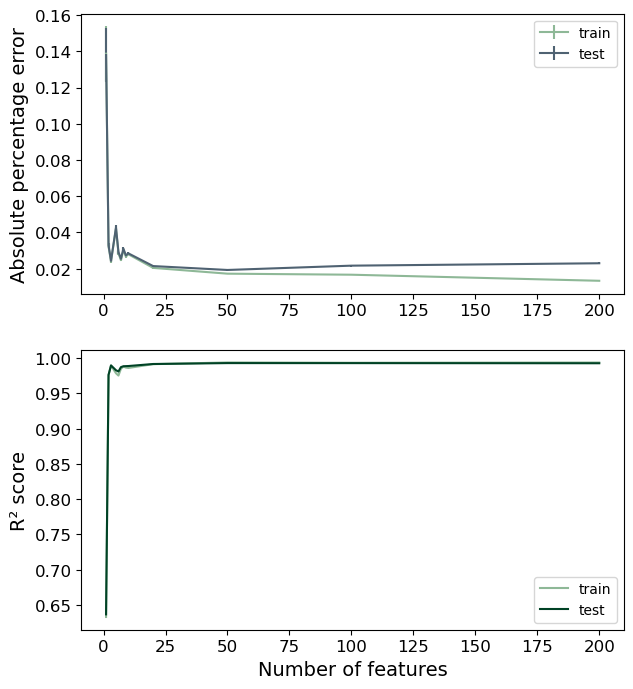

In [13]:

fetureas = [50, 20, 3]
start = 100
stop = 0
fig, (ax0, ax01) = plt.subplots(2, 1, figsize=(7, 8))

feature_selection_res = feature_selection_res[feature_selection_res['num_features'] != 4]
ax0.errorbar(x=feature_selection_res['num_features'], y=feature_selection_res['train_mape'],
             yerr=feature_selection_res['train_mape_var'],
             label='train', c=COLORS[3])
ax0.errorbar(x=feature_selection_res['num_features'], y=feature_selection_res['test_mape'],
             yerr=feature_selection_res['test_mape_var'],
             label='test', c=COLORS[0])
ax01.plot(feature_selection_res['num_features'], feature_selection_res['best r2 train'], label='train', c=COLORS[3])
ax01.plot(feature_selection_res['num_features'], feature_selection_res['best r2 test'], label='test', c=greens[0])
#ax0.set_xlabel('Number of features', fontsize=14)
ax0.set_ylabel(f'Absolute percentage error', fontsize=14)
ax01.set_xlabel('Number of features', fontsize=14)
ax01.set_ylabel(f'R\N{SUPERSCRIPT TWO} score', fontsize=14)
ax0.legend()
ax01.legend()
fig.align_ylabels([ax0, ax01])

#plt.suptitle(
#   f"{task.capitalize()} Performance of an DANN predicting networks’ mean performance",
#  wrap=True, fontsize=16 , y=0.91)
ax0.tick_params(axis='both', labelsize=12)
ax01.tick_params(axis='both', labelsize=12)
plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape_pres.png", bbox_inches='tight')
plt.show()

In [38]:
selected_features_res = pd.read_csv(f"{lgb_res_path}/{n_features}_feature_values.csv").drop("Unnamed: 0", axis=1)

In [25]:
selected_feature_names = list(selected_features_res.columns)[:-1]

In [26]:
num_columns = int(np.ceil(len(selected_feature_names) // 3))
num_rows = int(np.ceil(len(selected_feature_names) // num_columns))
fig, axs = plt.subplots(num_columns, num_rows, figsize=(12, 10), sharey='all')
min_x = 1.0
max_x = 0
idxs = []
if num_columns > 1 and num_rows > 1:
    r, c, = axs.shape
    for i in range(r):
        for j in range(c):
            idxs.append((i, j))
else:
    for j in range(axs.shape[0]):
        idxs.append(j)
for k, (f_name, loc_) in enumerate(zip(selected_feature_names, idxs)):
    x_data = selected_features_res[f_name]
    # if  len(set(res[f_name])) < 15:
    #     x_data = x_data + np.random.normal(-0.1, 0.1, len(x_data))
    axs[loc_].scatter(x_data, selected_features_res['label'], c=COLORS[3], s=0.5)
    if 'per_input' in f_name:
        neuron = f_name.split('(')[1].split(' ')[1].split(')')[0]
        f_name = f_name.split('(')[0].replace('num', '#') + neuron
    if len(f_name) > 40:
        name = f"{f_name.replace('_', ' ')[:22]}\n{f_name.replace('_', ' ')[22:]}"
    else:
        name = f"{f_name.replace('_', ' ')}"
    axs[loc_].set_xlabel(f"{name.capitalize()}", fontsize=18)
    #axs[i, j].set_ylim(0,1)
    axs[loc_].tick_params(axis='x', labelsize=12)
    axs[loc_].tick_params(axis='y', labelsize=12)
#axs[1].set_ylabel(f"Mean performance", fontsize=18)
axs[0].set_ylabel(f"Mean performance", fontsize=18)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_{n_features}_fetaures_dist.png")


In [27]:
from scipy.stats import multivariate_normal

selected_features_res

,max_possible_connections,total_connectivity_ratio_between_layers_2,motifs_count_1,label
0,368.0,0.36,324.0,0.619331
1,633.0,0.70,1124.0,0.712656
2,680.0,0.50,436.0,0.402813
3,480.0,0.17,135.0,0.371625
4,584.0,0.78,1833.0,0.826351
...,...,...,...,...
96721,480.0,0.37,569.0,0.724791
96722,309.0,0.20,222.0,0.416620
96723,425.0,0.14,135.0,0.401476
96724,584.0,0.90,2192.0,0.828459


In [39]:
selected_features_res = selected_features_res[selected_features_res['max_possible_connections'] == 248].sort_values(
    ['motifs_count_1', 'total_connectivity_ratio_between_layers_2']).sample(1000)

In [40]:
x = selected_features_res['total_connectivity_ratio_between_layers_2']
y = selected_features_res['motifs_count_1']

In [41]:
mu_x = x.mean()
mu_y = y.mean()
cov = np.cov(x, y)

In [42]:
x.shape

(1000,)

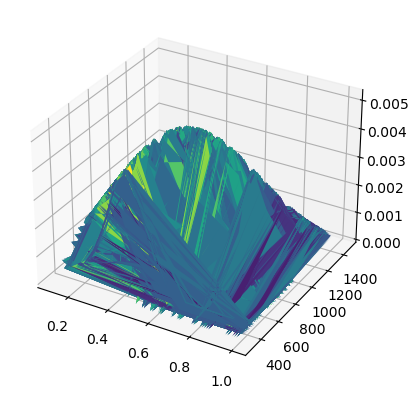

In [43]:
# create a multivariate normal distribution using the defined parameters
X, Y = np.meshgrid(x, y)  # create a grid for (x,y) pairs
# create an empty array of the same shape as X to hold the (x, y) coordinates
pos = np.empty(X.shape + (2,))
# fill the pos array with the x and y coordinates
pos[:, :, 0] = X
pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], cov)
# create a new figure for 3D plot
fig = plt.figure()
# add a 3D subplot to the figure
ax = fig.add_subplot(projection='3d')
# create a 3D surface plot of the multivariate normal distribution
ax.plot_surface(X, Y, rv.pdf(pos), cmap='viridis', linewidth=0)
plt.show()

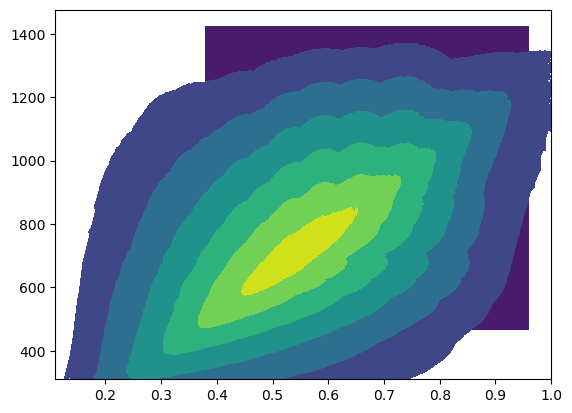

In [44]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(X, Y, rv.pdf(pos))
plt.show()

In [ ]:
import lightgbm
selected_features_res = pd.read_csv(f"{lgb_res_path}/{n_features}_feature_values.csv").drop("Unnamed: 0", axis=1)

model = lightgbm.LGBMRegressor(
)
model.fit(
    selected_features_res[['motifs_count_1', 'total_connectivity_ratio_between_layers_2', 'max_possible_connections']],
    selected_features_res['label'],
    feature_name=['motifs_count_1', 'total_connectivity_ratio_between_layers_2', 'max_possible_connections'],
)

In [ ]:
lightgbm.plot_tree(model)